In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class SelfOrganizingMap:
    def __init__(self, input_dim, grid_size, lr=0.1, epochs=1000):
        self.input_dim = input_dim
        self.grid_size = grid_size
        self.lr = lr
        self.epochs = epochs
        self.radius = max(grid_size) / 2
        self.weights = np.random.rand(*grid_size, input_dim)

    def find_bmu(self, sample):
        distances = np.linalg.norm(self.weights - sample, axis=2)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def update_weights(self, sample, bmu):
        i_indices, j_indices = np.indices(self.grid_size)
        distances = np.sqrt((i_indices - bmu[0])**2 + (j_indices - bmu[1])**2)
        influence = np.exp(-distances**2 / (2 * self.radius**2))
        self.weights += self.lr * influence[..., np.newaxis] * (sample - self.weights)

    def train(self, data):
        for _ in range(self.epochs):
            for sample in data:
                bmu = self.find_bmu(sample)
                self.update_weights(sample, bmu)
            self.lr *= 0.995
            self.radius *= 0.995

    def visualize(self):
        plt.imshow(self.weights.reshape(*self.grid_size, self.input_dim))
        plt.title("SOM")
        plt.show()

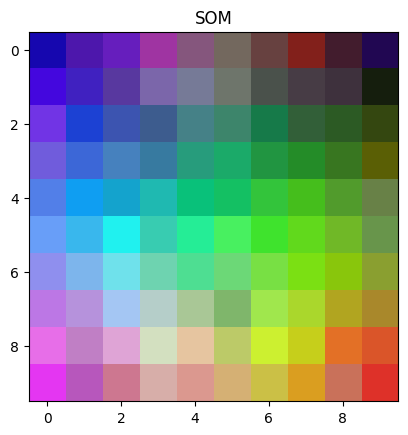

In [8]:
data = np.random.rand(100, 3)
som = SelfOrganizingMap(input_dim = 3, grid_size = (10, 10))
som.train(data)
som.visualize()